## Tarea 1
### TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.90*maxfil.

#### Resolucion
Utilizamos

In [ ]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
#Lee imagen de archivo
img = cv2.imread('mandril.jpg') 
#Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 255)


Máximo píxeles blancos en fila (maxfil): 0.419921875
Número de filas ≥ 90% de maxfil: 7
Posiciones de esas filas: [  6  12  15  20  21  88 100]


(0.0, 512.0)

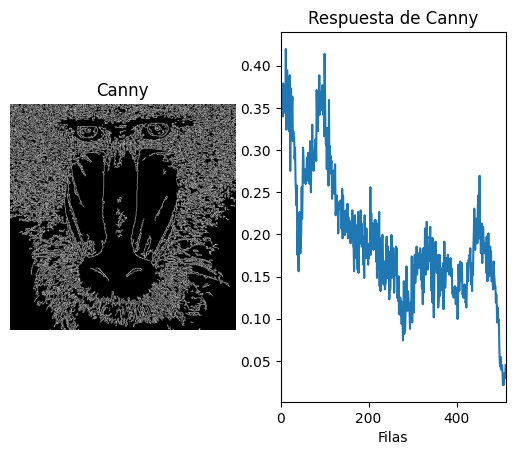

In [ ]:
      #El contenido de la imagen resultado de Canny, son valores 0 o 255, lo compruebas al descomentar
#print(canny)
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
gris = cv2.imread("mandril.jpg", cv2.IMREAD_GRAYSCALE)
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
rows = row_counts[:,0] / (255 * canny.shape[1])
maxfil = np.max(rows)
print("Máximo píxeles blancos en fila (maxfil):", maxfil)
limite = 0.9 * maxfil
filas_significativas = np.where(rows >= limite)[0]
print("Número de filas ≥ 90% de maxfil:", len(filas_significativas))
print("Posiciones de esas filas:", filas_significativas)
#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
#Rango en x definido por las Filas
plt.xlim([0, canny.shape[1]])

## Tarea 2
### TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.90*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen del mandril. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?.

#### Resolucion
Utilizamos

In [5]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
#Lee imagen de archivo
img = cv2.imread('mandril.jpg') 
#Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 255)
ggris = cv2.GaussianBlur(gris, (3, 3), 0)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

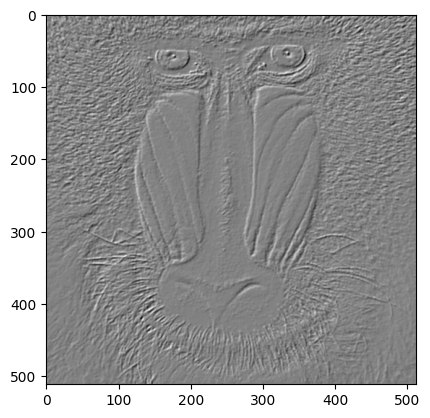

In [8]:
plt.imshow(sobel, cmap='gray')
